**MNIST dataset:**
(28 x 28 images of digits)


In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from IPython.core.display import update_display
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
scalar = tf.constant(0)
print(scalar)
scalar

tf.Tensor(0, shape=(), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [5]:
vector = tf.constant([0,1,2])
print(vector)
vector

tf.Tensor([0 1 2], shape=(3,), dtype=int32)


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [6]:
matrix = tf.constant([[0,1], [1,2], [2,3]])
print(matrix)
print('############')
matrix

tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int32)
############


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

In [7]:
x = np.array([[1,2], [3,4], [5,6]])
print(x)
print('############')
x

[[1 2]
 [3 4]
 [5 6]]
############


array([[1, 2],
       [3, 4],
       [5, 6]])

In [8]:
# NumPy array to tensor:
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
print(x_tensor)
print('############')
x_tensor

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
############


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [9]:
# Tensor to NumPy array using numpy()
x_back_to_numpy = x_tensor.numpy()
print(x_back_to_numpy)
print('############')
x_back_to_numpy

[[1. 2.]
 [3. 4.]
 [5. 6.]]
############


array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

In [10]:
# Tensor to NumPy array using NumPy array()
x_back_to_numpy2 = np.array(x_tensor)
print(x_back_to_numpy2)
print('############')
x_back_to_numpy2

[[1. 2.]
 [3. 4.]
 [5. 6.]]
############


array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

Flatten layers

In [11]:
flatten_layer = Flatten()
x = tf.constant([[[0,1], [1,2], [2,3]],
                [[10,11], [11,12], [12, 13]]])
print(x)
print('############')
x

tf.Tensor(
[[[ 0  1]
  [ 1  2]
  [ 2  3]]

 [[10 11]
  [11 12]
  [12 13]]], shape=(2, 3, 2), dtype=int32)
############


<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 0,  1],
        [ 1,  2],
        [ 2,  3]],

       [[10, 11],
        [11, 12],
        [12, 13]]], dtype=int32)>

In [12]:
x_flat = flatten_layer(x)
print(x_flat)
print('############')
x_flat

tf.Tensor(
[[ 0  1  1  2  2  3]
 [10 11 11 12 12 13]], shape=(2, 6), dtype=int32)
############


<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 0,  1,  1,  2,  2,  3],
       [10, 11, 11, 12, 12, 13]], dtype=int32)>

Dense layer

In [13]:
weights = tf.constant([[1, -1], [0, 1], [2, -2]])
bias = tf.constant([3, -4])
dense_layer = tf.keras.layers.Dense(units = 2, activation = 'relu')
dense_layer.build(input_shape = (1, 3))
dense_layer.set_weights([weights, bias])

x = tf.constant([[[1, 2, -1]]])
dense_output = dense_layer(x)
print(dense_output)

tf.Tensor([[[2. 0.]]], shape=(1, 1, 2), dtype=float32)


In [14]:
weights

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 1, -1],
       [ 0,  1],
       [ 2, -2]], dtype=int32)>

In [15]:
bias

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 3, -4], dtype=int32)>

In [16]:
dense_layer

In [17]:
x

<tf.Tensor: shape=(1, 1, 3), dtype=int32, numpy=array([[[ 1,  2, -1]]], dtype=int32)>

In [18]:
dense_output

<tf.Tensor: shape=(1, 1, 2), dtype=float32, numpy=array([[[2., 0.]]], dtype=float32)>

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model

In [20]:
print(model)

In [21]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa368ee62d0>>

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa368ee62d0>>


In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_1_input"}}, {"class_name": "Flatten", "config": {"name": "flatten_1", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"c

In [79]:
print(model.to_json())

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_3_input"}}, {"class_name": "Flatten", "config": {"name": "flatten_3", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"

In [26]:
model.layers

In [27]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [28]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)
print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_Y.shape)
print("Test labels shape: ", test_Y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000,)
Test labels shape:  (10000,)


In [29]:
train_Y_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
test_Y_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
test_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [33]:
train_Y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
test_Y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
history = model.fit(train_X, train_Y_categorical, epochs = 10, validation_split = 0.33)

Epoch 1/10
1257/1257 [==============================] - 9s 7ms/step - loss: 3.3038 - accuracy: 0.7812 - val_loss: 0.6948 - val_accuracy: 0.8538
Epoch 2/10
1257/1257 [==============================] - 8s 7ms/step - loss: 0.5604 - accuracy: 0.8688 - val_loss: 0.5125 - val_accuracy: 0.8836
Epoch 3/10
1257/1257 [==============================] - 8s 7ms/step - loss: 0.4156 - accuracy: 0.8969 - val_loss: 0.4312 - val_accuracy: 0.8998
Epoch 4/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3318 - accuracy: 0.9146 - val_loss: 0.3460 - val_accuracy: 0.9119
Epoch 5/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2911 - accuracy: 0.9243 - val_loss: 0.4594 - val_accuracy: 0.9173
Epoch 6/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.2618 - accuracy: 0.9324 - val_loss: 0.3244 - val_accuracy: 0.9268
Epoch 7/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2437 - accuracy: 0.9371 - val_loss: 0.3361 - val_accuracy:

In [36]:
history.history

{'loss': [3.3038041591644287,
  0.5604493618011475,
  0.41561564803123474,
  0.33182454109191895,
  0.29114440083503723,
  0.26176562905311584,
  0.24373207986354828,
  0.2316320538520813,
  0.21224960684776306,
  0.20915959775447845],
 'accuracy': [0.7811636924743652,
  0.8687529563903809,
  0.8969377279281616,
  0.9146247506141663,
  0.924326479434967,
  0.9323863983154297,
  0.9371128678321838,
  0.9406204223632812,
  0.9448991417884827,
  0.947436511516571],
 'val_loss': [0.6947733163833618,
  0.512500524520874,
  0.43119728565216064,
  0.34597069025039673,
  0.45941802859306335,
  0.3244461119174957,
  0.3361077606678009,
  0.2964424788951874,
  0.30076920986175537,
  0.30823343992233276],
 'val_accuracy': [0.8538457751274109,
  0.8835917115211487,
  0.8997525572776794,
  0.9118731617927551,
  0.9173274040222168,
  0.9268218874931335,
  0.9210646152496338,
  0.9367708563804626,
  0.9346497654914856,
  0.9364678263664246]}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
history.history.items()

dict_items([('loss', [3.3038041591644287, 0.5604493618011475, 0.41561564803123474, 0.33182454109191895, 0.29114440083503723, 0.26176562905311584, 0.24373207986354828, 0.2316320538520813, 0.21224960684776306, 0.20915959775447845]), ('accuracy', [0.7811636924743652, 0.8687529563903809, 0.8969377279281616, 0.9146247506141663, 0.924326479434967, 0.9323863983154297, 0.9371128678321838, 0.9406204223632812, 0.9448991417884827, 0.947436511516571]), ('val_loss', [0.6947733163833618, 0.512500524520874, 0.43119728565216064, 0.34597069025039673, 0.45941802859306335, 0.3244461119174957, 0.3361077606678009, 0.2964424788951874, 0.30076920986175537, 0.30823343992233276]), ('val_accuracy', [0.8538457751274109, 0.8835917115211487, 0.8997525572776794, 0.9118731617927551, 0.9173274040222168, 0.9268218874931335, 0.9210646152496338, 0.9367708563804626, 0.9346497654914856, 0.9364678263664246])])

Text(0, 0.5, 'Accuracy')

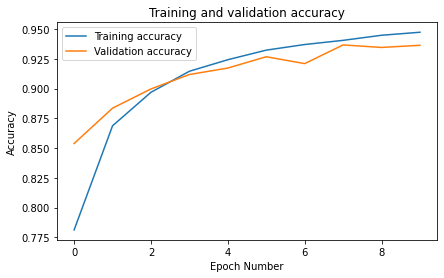

In [39]:
fig = plt.figure(figsize = (15, 4))
fig.add_subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training accuracy", "Validation accuracy"])
plt.title("Training and validation accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

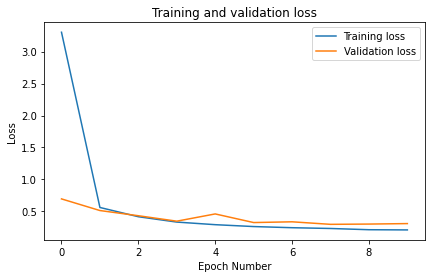

In [40]:
fig = plt.figure(figsize = (15, 4))
fig.add_subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training loss", "Validation loss"])
plt.title("Training and validation loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

Evaluate the Model

In [41]:
predict = model.predict(test_X[:1, :, :])
predict

1/1 [==============================] - 0s 80ms/step


array([[9.3934599e-15, 2.0654828e-10, 3.3909749e-04, 7.3480264e-06,
        1.8605757e-12, 3.1785592e-11, 9.3379037e-30, 9.9965346e-01,
        1.5227377e-15, 5.7350697e-11]], dtype=float32)

In [42]:
print(predict)

[[9.3934599e-15 2.0654828e-10 3.3909749e-04 7.3480264e-06 1.8605757e-12
  3.1785592e-11 9.3379037e-30 9.9965346e-01 1.5227377e-15 5.7350697e-11]]


In [43]:
predict.shape

(1, 10)

In [44]:
predict[0]

array([9.3934599e-15, 2.0654828e-10, 3.3909749e-04, 7.3480264e-06,
       1.8605757e-12, 3.1785592e-11, 9.3379037e-30, 9.9965346e-01,
       1.5227377e-15, 5.7350697e-11], dtype=float32)

In [45]:
print(predict[0])

[9.3934599e-15 2.0654828e-10 3.3909749e-04 7.3480264e-06 1.8605757e-12
 3.1785592e-11 9.3379037e-30 9.9965346e-01 1.5227377e-15 5.7350697e-11]


In [46]:
predict[-1]

array([9.3934599e-15, 2.0654828e-10, 3.3909749e-04, 7.3480264e-06,
       1.8605757e-12, 3.1785592e-11, 9.3379037e-30, 9.9965346e-01,
       1.5227377e-15, 5.7350697e-11], dtype=float32)

In [47]:
print("Classification of the first test image: digit ", np.argmax(predict[0]))

Classification of the first test image: digit  7


In [48]:
test_predict = model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


In [49]:
print(test_predict)

[[9.3934954e-15 2.0654828e-10 3.3909749e-04 ... 9.9965346e-01
  1.5227435e-15 5.7350260e-11]
 [0.0000000e+00 4.2139456e-09 9.9999994e-01 ... 0.0000000e+00
  8.6203998e-25 0.0000000e+00]
 [1.5868066e-31 9.9998170e-01 9.7453352e-09 ... 2.1338471e-06
  3.8768073e-07 1.1037161e-12]
 ...
 [2.5420382e-34 1.9625215e-05 6.5884819e-07 ... 2.3828112e-03
  1.4916625e-07 6.3726544e-01]
 [1.1017125e-24 0.0000000e+00 0.0000000e+00 ... 4.6335892e-32
  0.0000000e+00 1.4172674e-25]
 [6.8566502e-10 7.3313214e-32 1.4548492e-12 ... 4.2829803e-18
  1.2907903e-11 4.2123102e-22]]


In [50]:
test_predict

array([[9.3934954e-15, 2.0654828e-10, 3.3909749e-04, ..., 9.9965346e-01,
        1.5227435e-15, 5.7350260e-11],
       [0.0000000e+00, 4.2139456e-09, 9.9999994e-01, ..., 0.0000000e+00,
        8.6203998e-25, 0.0000000e+00],
       [1.5868066e-31, 9.9998170e-01, 9.7453352e-09, ..., 2.1338471e-06,
        3.8768073e-07, 1.1037161e-12],
       ...,
       [2.5420382e-34, 1.9625215e-05, 6.5884819e-07, ..., 2.3828112e-03,
        1.4916625e-07, 6.3726544e-01],
       [1.1017125e-24, 0.0000000e+00, 0.0000000e+00, ..., 4.6335892e-32,
        0.0000000e+00, 1.4172674e-25],
       [6.8566502e-10, 7.3313214e-32, 1.4548492e-12, ..., 4.2829803e-18,
        1.2907903e-11, 4.2123102e-22]], dtype=float32)

In [51]:
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis = 1)
test_predict_labels

array([7, 2, 1, ..., 9, 5, 6])

In [52]:
confusion_matrix = tf.math.confusion_matrix(labels = test_Y, predictions = test_predict_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 946,    0,    3,    1,    1,    2,   14,    4,    9,    0],
       [   0, 1107,    2,    8,    0,    1,    2,    0,   14,    1],
       [   5,    1,  934,   25,    3,    1,    8,    5,   48,    2],
       [   0,    0,    7,  972,    1,   10,    0,    3,   15,    2],
       [   1,    1,    0,    1,  892,    0,   16,    2,   15,   54],
       [   5,    1,    0,   38,    3,  809,    5,    1,   25,    5],
       [   3,    3,    0,    1,    6,   10,  917,    0,   18,    0],
       [   2,    4,   26,   29,    2,    2,    0,  935,   11,   17],
       [   4,    0,    6,   11,    5,   19,    4,    4,  916,    5],
       [   4,    5,    1,   13,    8,    6,    0,   10,   21,  941]],
      dtype=int32)>

In [53]:
print(confusion_matrix)

tf.Tensor(
[[ 946    0    3    1    1    2   14    4    9    0]
 [   0 1107    2    8    0    1    2    0   14    1]
 [   5    1  934   25    3    1    8    5   48    2]
 [   0    0    7  972    1   10    0    3   15    2]
 [   1    1    0    1  892    0   16    2   15   54]
 [   5    1    0   38    3  809    5    1   25    5]
 [   3    3    0    1    6   10  917    0   18    0]
 [   2    4   26   29    2    2    0  935   11   17]
 [   4    0    6   11    5   19    4    4  916    5]
 [   4    5    1   13    8    6    0   10   21  941]], shape=(10, 10), dtype=int32)


In [54]:
confusion_matrix.is_packed

False

In [55]:
print("Confusion matrix of the test set:\n\n", confusion_matrix)

Confusion matrix of the test set:

 tf.Tensor(
[[ 946    0    3    1    1    2   14    4    9    0]
 [   0 1107    2    8    0    1    2    0   14    1]
 [   5    1  934   25    3    1    8    5   48    2]
 [   0    0    7  972    1   10    0    3   15    2]
 [   1    1    0    1  892    0   16    2   15   54]
 [   5    1    0   38    3  809    5    1   25    5]
 [   3    3    0    1    6   10  917    0   18    0]
 [   2    4   26   29    2    2    0  935   11   17]
 [   4    0    6   11    5   19    4    4  916    5]
 [   4    5    1   13    8    6    0   10   21  941]], shape=(10, 10), dtype=int32)


In [56]:
flat_layer = model.layers[0]
flat_layer

In [57]:
print(flat_layer.compute_dtype)

float32


In [58]:
hidden_layer = model.layers[1]

In [59]:
print(hidden_layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")


In [60]:
output_layer = model.layers[2]
output_layer

In [61]:
output_layer = model.layers[0]
output_layer

In [62]:
print(output_layer)

In [63]:
def get_hidden_layer_output(model, X):
  # Convert X to a tensor
  x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                           dtype=tf.dtypes.float32)
  # Model layers
  flat_layer = model.layers[0]
  hidden_layer = model.layers[1]
  output_layer = model.layers[2]
  # pass x through different layers
  flat_tensor = flat_layer(x)
  hidden_tensor = hidden_layer(flat_tensor)
  output_tensor = output_layer(hidden_tensor)
  predicted_digit = np.argmax(output_tensor)
  return hidden_tensor, predicted_digit

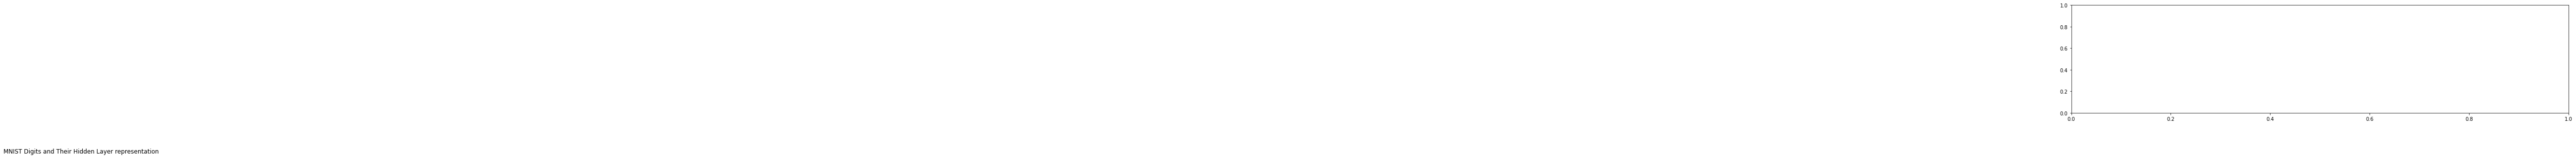

In [64]:
total_cols = 0
fig, ax = plt.subplots(nrows=2, ncols = total_cols, figsize=(18, 4), subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
  image = test_X[j, :, :]
  h, prediction = get_hidden_layer_output(model, image)
  ax[0, j].imshow(image)
  ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))
  ax[0, j].set_title("Digit " + str(test_Y[j]))
  ax[1, j].set_title("Classification " + str(prediction))
plt.title("MNIST Digits and Their Hidden Layer representation ", y = -0.4, x = -4)
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)
an example of test_Y_categorical [0. 0. 1. ... 0. 0. 0.]
shape of test_Y_categorical is (10000, 10)
Epoch 1/10
1257/1257 [==============================] - 5s 4ms/step - loss: 2.71

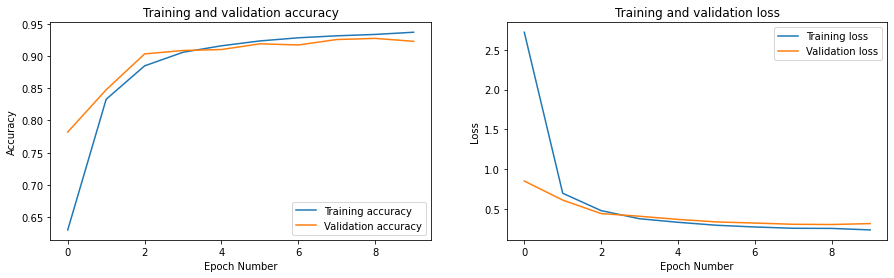

1/1 [==============================] - 0s 46ms/step
Predict shape:  (1, 10)
Prediction for first test image: 
 [7.7369641e-15 3.4952381e-09 2.0777593e-06 1.4622823e-06 6.3002666e-11
 1.1195501e-11 1.6113571e-17 9.9999654e-01 3.7205406e-13 3.2197292e-10]
Classification of the first test image: digit  7
313/313 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.9301
Classification accuracy on training set:  0.9327333569526672
Classification accuracy on test set:  0.9301000237464905
313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 957    0    5    0    1    1    4    1   11    0]
 [   0 1115    9    4    0    1    1    0    5    0]
 [   4    2  960    5    7    1    3    8   39    3]
 [   0    0   51  873    0   40    0   13   31    2]
 [   2    3    8    0  910    0   13    2   13   31]
 [   5    1    4   17    3  808   10    6   36    2]
 [   5    3   15    0    6   16  901    0   12    0]
 [   0    4   29  

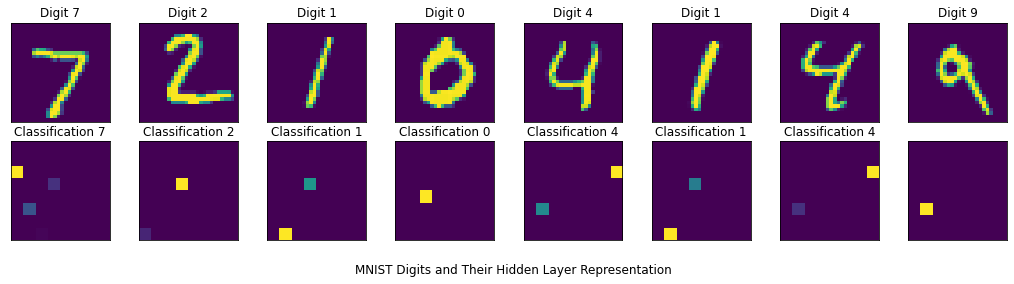

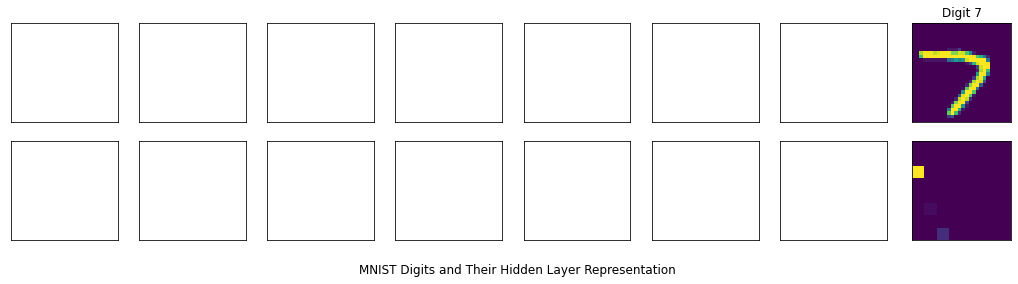

In [65]:
# Solution from Dr. Gu:

# %%
import tensorflow as tf
# For layers
from tensorflow.keras.layers import Flatten, Dense
# For miscellaneous functions
from tensorflow.keras import utils
# For datasets
from tensorflow.keras.datasets import mnist
# For math functions and arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt

# %%
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

# %%
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# %%
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_X.shape)
print("Test labels shape: ", test_Y.shape)

print('an example of test_Y_categorical',test_Y_categorical[:,1])
print('shape of test_Y_categorical is',test_Y_categorical.shape)

# %%
history = model.fit(train_X, train_Y_categorical, epochs=10, validation_split=0.33)

# %%
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

# %%
predict = model.predict(test_X[:1,:,:])
print('Predict shape: ', predict.shape)
print('Prediction for first test image: \n', predict[0])
print('Classification of the first test image: digit ', np.argmax(predict[0]))

# %%
train_loss, train_acc = model.evaluate(train_X,  train_Y_categorical)
test_loss, test_acc = model.evaluate(test_X,  test_Y_categorical)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

# %%
test_predict = model.predict(test_X)
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

# %%
flat_layer = model.layers[0]
hidden_layer = model.layers[1]
output_layer = model.layers[2]

def get_hidden_layer_output(model, X):  
    # Convert X to a tensor
    x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                             dtype=tf.dtypes.float32)# Model layers
    flat_layer = model.layers[0]
    hidden_layer = model.layers[1]
    output_layer = model.layers[2]# Pass x through different layers
    flat_tensor = flat_layer(x)
    hidden_tensor = hidden_layer(flat_tensor)
    output_tensor = output_layer(hidden_tensor)
    predicted_digit = np.argmax(output_tensor)
    return hidden_tensor, predicted_digit


# %%
total_cols = 8
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
    image = test_X[j, :, :]
    h, prediction = get_hidden_layer_output(model, image)
    ax[0, j].imshow(image)
    ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
    ax[0, j].set_title('Digit ' + str(test_Y[j]))
    ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   

# %%
test_X.shape

# %%
test_num=70
image = test_X[test_num, :, :]
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
h, prediction = get_hidden_layer_output(model, image)
ax[0, j].imshow(image)
ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
ax[0, j].set_title('Digit ' + str(test_Y[test_num]))
ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   

# %%





In [66]:
# solution Dr. Gu in Jupyter format to understand better!
import tensorflow as tf
# For layers
from tensorflow.keras.layers import Flatten, Dense
# For miscellaneous functions
from tensorflow.keras import utils
# For datasets
from tensorflow.keras.datasets import mnist
# For math functions and arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_X.shape)
print("Test labels shape: ", test_Y.shape)

print('an example of test_Y_categorical',test_Y_categorical[:,1])
print('shape of test_Y_categorical is',test_Y_categorical.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)
an example of test_Y_categorical [0. 0. 1. ... 0. 0. 0.]
shape of test_Y_categorical is (10000, 10)


In [70]:
history = model.fit(train_X, train_Y_categorical, epochs=10, validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 5s 3ms/step - loss: 3.0240 - accuracy: 0.7475 - val_loss: 0.7489 - val_accuracy: 0.8188
Epoch 2/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.6278 - accuracy: 0.8517 - val_loss: 0.5670 - val_accuracy: 0.8693
Epoch 3/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4632 - accuracy: 0.8833 - val_loss: 0.4518 - val_accuracy: 0.9010
Epoch 4/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.3779 - accuracy: 0.9056 - val_loss: 0.3810 - val_accuracy: 0.9044
Epoch 5/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2988 - accuracy: 0.9206 - val_loss: 0.3632 - val_accuracy: 0.9186
Epoch 6/10
1257/1257 [==============================] - 7s 6ms/step - loss: 0.2729 - accuracy: 0.9290 - val_loss: 0.3008 - val_accuracy: 0.9243
Epoch 7/10
1257/1257 [==============================] - 9s 7ms/step - loss: 0.2489 - accuracy: 0.9346 - val_loss: 0.2925 - val_accuracy:

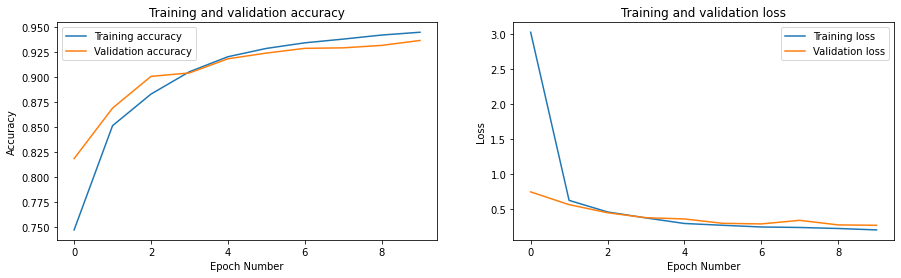

In [71]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [72]:
predict = model.predict(test_X[:1,:,:])
print('Predict shape: ', predict.shape)
print('Prediction for first test image: \n', predict[0])
print('Classification of the first test image: digit ', np.argmax(predict[0]))

1/1 [==============================] - 0s 143ms/step
Predict shape:  (1, 10)
Prediction for first test image: 
 [2.9075536e-21 1.7368529e-05 1.1781148e-06 5.1576459e-09 4.1415748e-05
 1.5311915e-06 4.8092826e-34 9.9991703e-01 1.8308974e-07 2.1329861e-05]
Classification of the first test image: digit  7


In [73]:
train_loss, train_acc = model.evaluate(train_X,  train_Y_categorical)
test_loss, test_acc = model.evaluate(test_X,  test_Y_categorical)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9383
Classification accuracy on training set:  0.9468500018119812
Classification accuracy on test set:  0.9383000135421753


In [74]:
test_predict = model.predict(test_X)
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 948    0    1    1    2    1   11    1   14    1]
 [   0 1120    3    2    1    1    2    0    6    0]
 [   7    3  955   19    3    0    7    3   35    0]
 [   1    0   10  954    0    8    0    1   33    3]
 [   1    0    6    0  921    0    8    1   12   33]
 [   2    0    1   29    0  798   11    1   48    2]
 [   6    2    5    1    6    9  905    0   24    0]
 [   2    3   25   17   12    1    0  922   14   32]
 [   3    1    8    6    7    2    3    2  940    2]
 [   4    4    0    7   35    2    0    5   32  920]], shape=(10, 10), dtype=int32)


In [75]:
flat_layer = model.layers[0]
hidden_layer = model.layers[1]
output_layer = model.layers[2]

def get_hidden_layer_output(model, X):  
    # Convert X to a tensor
    x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                             dtype=tf.dtypes.float32)# Model layers
    flat_layer = model.layers[0]
    hidden_layer = model.layers[1]
    output_layer = model.layers[2]# Pass x through different layers
    flat_tensor = flat_layer(x)
    hidden_tensor = hidden_layer(flat_tensor)
    output_tensor = output_layer(hidden_tensor)
    predicted_digit = np.argmax(output_tensor)
    return hidden_tensor, predicted_digit


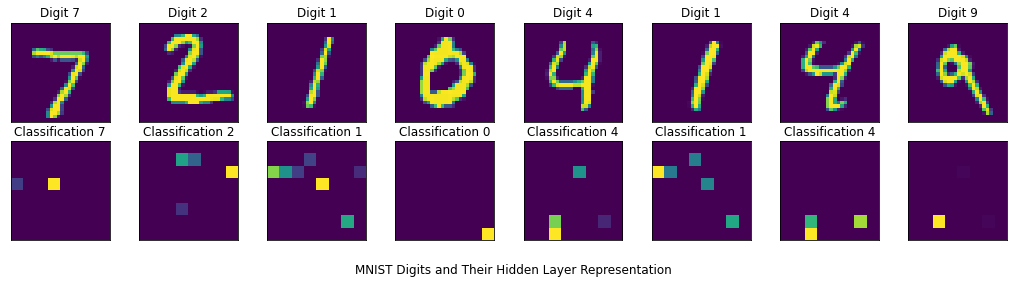

In [76]:
total_cols = 8
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
    image = test_X[j, :, :]
    h, prediction = get_hidden_layer_output(model, image)
    ax[0, j].imshow(image)
    ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
    ax[0, j].set_title('Digit ' + str(test_Y[j]))
    ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   

In [77]:
test_X.shape


(10000, 28, 28)

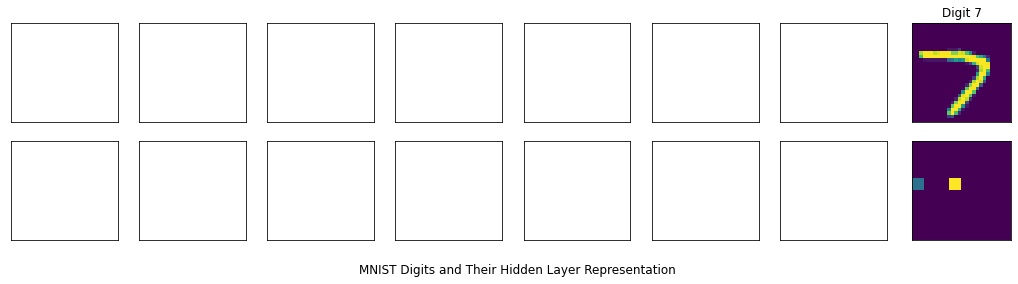

In [78]:
test_num=70
image = test_X[test_num, :, :]
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
h, prediction = get_hidden_layer_output(model, image)
ax[0, j].imshow(image)
ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
ax[0, j].set_title('Digit ' + str(test_Y[test_num]))
ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   